In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datafile = 'pro_fofR_forge/profile/lgfR0.txt'
#lgfR_data = np.loadtxt(datafile)

In [4]:
import pandas as pd

# Load the data from the file
file_path = datafile
data = pd.read_csv(file_path, delim_whitespace=True)

# Convert the DataFrame to a dictionary where each key is a column header
# and the value is a list of the data in that column
data_dict = data.to_dict(orient='list')

# Display the dictionary to check
for key, value in data_dict.items():
    print(f"{key}: {value[:]}")  # Print only the first 5 items for brevity


lgfR0: [4.84104, 5.24195, 5.30103, 5.388, 5.53854, 5.848, 6.0827, 6.24566, 6.41913]
Delta_chi2: [10.24757932, 3.5948717221, 2.6569474409, 1.8316033467, 0.63105931898, 0.0018873548614, 0.4608693626, 0.84411083341, 1.3700380411]
-loglkl: [5.9474587173, 2.6211049185, 2.1521427778, 1.7394707307, 1.1391987169, 0.82461273482, 1.0541037387, 1.2457244741, 1.5086880779]
avg_best_loglkl: [5.9474587173, 2.6211049185, 2.1521427778, 1.7394707307, 1.1391987169, 0.82461273482, 1.0541037387, 1.2457244741, 1.5086880779]
initial_loglkl: [3436.5388093, 577.83318214, 385.44005789, 187.75700613, 33.531916197, 0.9935775138, 1.6395538759, 1.5543242746, 1.9294120113]
omega_b: [0.0224894577, 0.0224494356, 0.0224462281, 0.0224474307, 0.0224425521, 0.0224424397, 0.0224452975, 0.0224440024, 0.0224439301]
omega_cdm: [0.1152341599, 0.1188374185, 0.119255259, 0.1196292667, 0.1202489303, 0.121106612, 0.1216311557, 0.121748553, 0.1221013389]
H0: [66.6910571733, 66.5130641319, 66.4383310028, 66.2953173342, 66.032954743

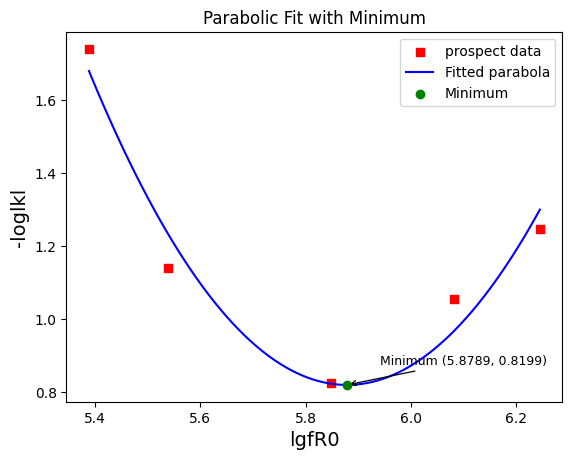

The fitted parameters are: a=3.5659511248115483, b=-41.927521540032124, c=124.06312321113464
The minimum of the parabola is at x=5.8789, y=0.8199


In [5]:
from scipy.optimize import curve_fit

# Example data
x_d = 'lgfR0' #'lgfR0'
y_d = '-loglkl'
x_data = data_dict[x_d][3:-1]
y_data = data_dict[y_d][3:-1]

# Parabolic function
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the model
params, covariance = curve_fit(parabola, x_data, y_data)

# Extracting parameters
a, b, c = params

# Finding the minimum (vertex of the parabola)
x_min = -b / (2 * a)
y_min = parabola(x_min, a, b, c)

# Generate data for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = parabola(x_fit, *params)

# Plotting the data and the minimum point
plt.scatter(x_data, y_data, marker='s', color='red', label='prospect data')
plt.plot(x_fit, y_fit, color='blue', label='Fitted parabola')
plt.scatter(x_min, y_min, color='green', label='Minimum', zorder=5)

# Annotate the minimum point
plt.annotate(f'Minimum ({x_min:.4f}, {y_min:.4f})', xy=(x_min, y_min), xycoords='data',
             xytext=(0.8, 0.1), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=0.9), fontsize=9, ha='center')

plt.legend()
plt.xlabel(x_d, fontsize=14)
plt.ylabel(y_d, fontsize=14)
plt.title('Parabolic Fit with Minimum')
plt.show()

print(f"The fitted parameters are: a={a}, b={b}, c={c}")
print(f"The minimum of the parabola is at x={x_min:.4f}, y={y_min:.4f}")


In [6]:
from scipy.interpolate import InterpolatedUnivariateSpline as intp1

In [7]:
x_data = data_dict[x_d][:]
y_data = data_dict[y_d][:]

In [8]:
chi2spli = intp1(x_data, y_data)

In [9]:
paramparab=[3.5659511248115483, 41.927521540032124, 124.06312321113464]

In [10]:
np.savez('./chi2_lgfR0.npz', x=x_data, y=y_data, interval1=np.array([5.493645475547554, 6.293501473147314])
        , interval2=np.array([5.227079417941794, 6.4189721752175215]), parabola=np.array(paramparab))

In [26]:
xl = np.linspace(4.9, 6.4, 1000)
xl;

In [27]:
chi2spli(5.9121)

array(0.87036613)

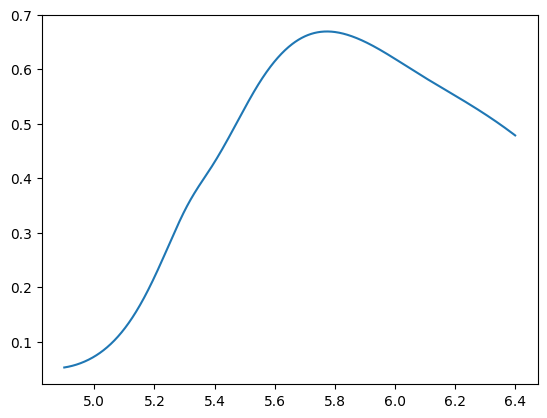

In [32]:
plt.plot(xl, np.exp(-0.5*chi2spli(xl)))

In [40]:
parabola(5.24195, *params)

3.999980639297064

In [ ]:
parabola(5.53854, *params)

0.9999715333242989

In [ ]:
parabola(6.41913, *params)

3.9999831534391888

In [37]:
parabola(6.24566, *params)

2.000005600432587

In [9]:
print(data_dict.keys())

dict_keys(['lgfR0', 'Delta_chi2', '-loglkl', 'avg_best_loglkl', 'initial_loglkl', 'omega_b', 'omega_cdm', 'H0', 'ln10^{10}A_s', 'n_s', 'aIA', 'etaIA', 'log10Mc', 'thej'])


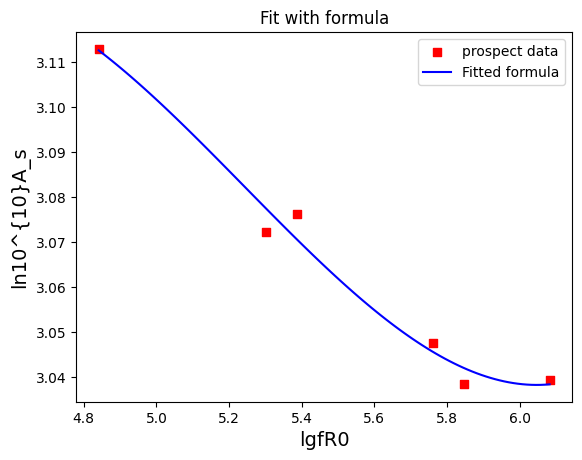

The fitted parameters are: a=0.04225631998371008, b=-0.6645183646805201, c=3.4012004237213413


In [11]:
from scipy.optimize import curve_fit

# Example data
x_d = 'lgfR0' #'lgfR0'
y_d = 'ln10^{10}A_s'
x_data = data_dict[x_d][:]
y_data = data_dict[y_d][:]

# Parabolic function
def fitformula(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d 

# Fit the model
params, covariance = curve_fit(fitformula, x_data, y_data)

# Extracting parameters
a, b, c, d = params

# Finding the minimum (vertex of the parabola)
#x_min = -b / (2 * a)
#y_min = parabola(x_min, a, b, c)

# Generate data for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = fitformula(x_fit, *params)

# Plotting the data and the minimum point
plt.scatter(x_data, y_data, marker='s', color='red', label='prospect data')
plt.plot(x_fit, y_fit, color='blue', label='Fitted formula')
#plt.scatter(x_min, y_min, color='green', label='Minimum', zorder=5)

# Annotate the minimum point
plt.annotate(f'Minimum ({5.2989:.4f}, {67:.4f})', xy=(5.2989, 67.0), xycoords='data',
             xytext=(0.8, 0.1), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=0.9), fontsize=9, ha='center')

plt.legend()
plt.xlabel(x_d, fontsize=14)
plt.ylabel(y_d, fontsize=14)
plt.title('Fit with formula')
plt.show()

print(f"The fitted parameters are: a={a}, b={b}, c={c}")
#print(f"The minimum of the parabola is at x={x_min:.4f}, y={y_min:.4f}")
